In [6]:
import ioNERDSS as io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import ioNERDSS as io

In [2]:
# def read_multi_hist_df(FileName:str, Time:float, SpeciesList:list):
#     df = io.multi_hist_to_df(FileName, SaveCsv = False)
#     df = df[df['Time (s)'] == Time]
#     SpeciesList.append('Count')
#     count_df = pd.DataFrame(columns = SpeciesList)
#     index = 0
#     for i in range(len(df.columns)):
#         if i != 0 and df.iloc[0,i] != 0.0:
#             name_count = df.columns[i].strip('.').split('. ')
#             for j in range(len(name_count)):
#                 name = str(name_count[j].split(': ')[0])
#                 count = int(name_count[j].split(': ')[1])
#                 count_df.loc[index, name] = count
#             count_df.loc[index, 'Count'] = df.iloc[0, i]
#             index += 1
#     count_df = count_df.fillna(0)
#     return count_df

# read_multi_hist_df(FileName = 'histogram_complexes_time.dat', Time = 0.009, SpeciesList = ['A','B'])

In [3]:
# !!!ALREADY UPLOADED TO PACKAGE!!!

def read_multi_hist(FileName:str, SpeciesList:list):
    SpeciesList = np.array(SpeciesList)
    hist_list = []
    time_temp = []
    with open(FileName, 'r') as file:
        for line in file.readlines():
            if line[0:10] == 'Time (s): ':
                if float(line.split(' ')[-1].strip('\n')) != 0:
                    hist_list.append(time_temp)
                time_temp = []
                time_temp.append(float(line.split(' ')[-1].strip('\n')))
            else:
                complex_temp = np.zeros(len(SpeciesList) + 1)
                count = int(line.split('	')[0])
                info = line.strip('. \n').split('	')[1].split('. ')
                for i in range(len(info)):
                    name = str(info[i].split(': ')[0])
                    num = int(info[i].split(': ')[1])
                    index = np.where(SpeciesList == name)[0][0]
                    complex_temp[index] += num
                complex_temp[-1] += count
                time_temp.append(complex_temp)
        hist_list.append(time_temp)
    return hist_list


In [4]:
# ### WITHOUT considering BarSize or ExcludeSize!

# def multi_hist(FileName:str, FileNum:int, InitialTime:float, FinalTime:float, \
#                SpeciesList:list, xAxis:str, SaveFig:bool = False):
#     file_name_head = FileName.split('.')[0]
#     file_name_tail = FileName.split('.')[1]
#     count_list = []
#     size_list = []
#     for i in range(1, FileNum+1):
#         temp_file_name = file_name_head + '_' + str(i) + '.' + file_name_tail
#         if FileNum == 1:
#             temp_file_name = 'histogram_complexes_time.dat'
#         total_size_list = []
#         total_count_list = []
#         hist_list = read_multi_hist(temp_file_name, SpeciesList = SpeciesList)
#         data_count = 0
#         for j in range(len(hist_list)):
#             if hist_list[j] != []:
#                 time = hist_list[j][0]
#                 if InitialTime <= time <= FinalTime:
#                     data_count += 1
#                     for k in range(len(hist_list[j])):
#                         if k != 0:
#                             if xAxis == 'tot':
#                                 total_size = sum(hist_list[j][k][0:-1])
#                                 if total_size not in total_size_list:
#                                     total_size_list.append(total_size)
#                                     total_count_list.append(hist_list[j][k][-1])
#                                 else:
#                                     index = total_size_list.index(total_size)
#                                     total_count_list[index] += hist_list[j][k][-1]
#                             elif xAxis in SpeciesList:
#                                 name_index = SpeciesList.index(xAxis)
#                                 total_size = hist_list[j][k][name_index]
#                                 if total_size not in total_size_list:
#                                     total_size_list.append(total_size)
#                                     total_count_list.append(hist_list[j][k][-1])
#                                 else:
#                                     index = total_size_list.index(total_size)
#                                     total_count_list[index] += hist_list[j][k][-1]
#                             else:
#                                 print('xAxis not in SpeciesList!')
#                                 return 0
#         total_count_list = np.array(total_count_list)/data_count
#         total_size_list_sorted = np.arange(1, max(total_size_list)+1, 1)
#         total_count_list_sorted = []
#         for i in total_size_list_sorted:
#             if i in total_size_list:
#                 index = total_size_list.index(i)
#                 total_count_list_sorted.append(total_count_list[index])
#             else:
#                 total_count_list_sorted.append(0.0)
#         size_list.append(total_size_list_sorted)
#         count_list.append(total_count_list_sorted)
#     max_size = 0
#     for i in size_list:
#         if max_size < len(i):
#             max_size = len(i)
#             n_list = i
#     count_list_filled = np.zeros([FileNum, max_size])
#     count_list_arr = np.array([])
#     for i in range(len(count_list)):
#         for j in range(len(count_list[i])):
#             count_list_filled[i][j] += count_list[i][j]
#     count_list_rev = []
#     for i in range(len(count_list_filled[0])):
#         temp = []
#         for j in range(len(count_list_filled)):
#             temp.append(count_list_filled[j][i])
#         count_list_rev.append(temp)
#     mean = []
#     std = []
#     for i in count_list_rev:
#         mean.append(np.nanmean(i))
#         if FileNum != 1:
#             std.append(np.nanstd(i))
#     if FileNum != 1:
#         plt.bar(n_list, mean, color = 'C0', yerr = std, ecolor = 'C1', capsize = 2)
#     else:
#         plt.bar(n_list, mean)
#     if xAxis == 'tot':
#         label_name = 'total monomers'
#     else:
#         label_name = xAxis
#     plt.xlabel('# of ' + label_name + ' in sigle complex')
#     plt.ylabel('Count')
#     plt.title('Histogram of Multi-component Assemblies')
#     fig_species = xAxis
#     if xAxis == 'tot':
#         fig_species = 'total_components'
#     fig_name = 'histogram_of_' + fig_species
#     if SaveFig:
#         plt.savefig(fig_name, dpi = 500)
#     plt.show()
#     return 0           

In [5]:
# !!!ALREADY UPLOADED TO PACKAGE!!!

def multi_hist(FileName:str, FileNum:int, InitialTime:float, FinalTime:float, \
               SpeciesList:list, xAxis:str, BarSize:int = 1, ExcludeSize:int = 0, \
               SaveFig:bool = False):
    file_name_head = FileName.split('.')[0]
    file_name_tail = FileName.split('.')[1]
    count_list = []
    size_list = []
    for i in range(1, FileNum+1):
        temp_file_name = file_name_head + '_' + str(i) + '.' + file_name_tail
        if FileNum == 1:
            temp_file_name = 'histogram_complexes_time.dat'
        total_size_list = []
        total_count_list = []
        hist_list = read_multi_hist(temp_file_name, SpeciesList = SpeciesList)
        data_count = 0
        for j in range(len(hist_list)):
            if hist_list[j] != []:
                time = hist_list[j][0]
                if InitialTime <= time <= FinalTime:
                    data_count += 1
                    for k in range(len(hist_list[j])):
                        if k != 0:
                            if xAxis == 'tot':
                                total_size = sum(hist_list[j][k][0:-1])
                                if total_size >= ExcludeSize:
                                    if total_size not in total_size_list:
                                        total_size_list.append(total_size)
                                        total_count_list.append(hist_list[j][k][-1])
                                    else:
                                        index = total_size_list.index(total_size)
                                        total_count_list[index] += hist_list[j][k][-1]
                            elif xAxis in SpeciesList:
                                name_index = SpeciesList.index(xAxis)
                                total_size = hist_list[j][k][name_index]
                                if total_size >= ExcludeSize:
                                    if total_size not in total_size_list:
                                        total_size_list.append(total_size)
                                        total_count_list.append(hist_list[j][k][-1])
                                    else:
                                        index = total_size_list.index(total_size)
                                        total_count_list[index] += hist_list[j][k][-1]
                            else:
                                print('xAxis not in SpeciesList!')
                                return 0
        total_count_list = np.array(total_count_list)/data_count
        if len(total_size_list) != 0:
            total_size_list_sorted = np.arange(1, max(total_size_list)+1, 1)
        else:
            total_size_list_sorted = np.array([])
        total_count_list_sorted = []
        for i in total_size_list_sorted:
            if i in total_size_list:
                index = total_size_list.index(i)
                total_count_list_sorted.append(total_count_list[index])
            else:
                total_count_list_sorted.append(0.0)
        size_list.append(total_size_list_sorted)
        count_list.append(total_count_list_sorted)
    max_size = 0
    for i in size_list:
        if max_size < len(i):
            max_size = len(i)
            n_list = i
    count_list_filled = np.zeros([FileNum, max_size])
    count_list_arr = np.array([])
    for i in range(len(count_list)):
        for j in range(len(count_list[i])):
            count_list_filled[i][j] += count_list[i][j]
    count_list_rev = []
    for i in range(len(count_list_filled[0])):
        temp = []
        for j in range(len(count_list_filled)):
            temp.append(count_list_filled[j][i])
        count_list_rev.append(temp)
    mean = []
    std = []
    for i in count_list_rev:
        mean.append(np.nanmean(i))
        std.append(np.nanstd(i))
    
    mean_ = []
    std_ = []
    n_list_ = []
    temp_mean = 0
    temp_std = 0
    bar_size_count = 0
    for i in range(len(mean)):
        temp_mean += mean[i]
        temp_std += std[i]
        bar_size_count += 1
        if i+1 == len(mean):
            mean_.append(temp_mean)
            std_.append(temp_std)
            n_list_.append(n_list[i])
        elif bar_size_count >= BarSize:
            mean_.append(temp_mean)
            std_.append(temp_std)
            n_list_.append(n_list[i])
            temp_mean = 0
            temp_std = 0
            bar_size_count = 0
    mean_ = np.array(mean_)
    std_ = np.array(std_)
    n_list_ = np.array(n_list_)
    
    if FileNum != 1:
        plt.bar(n_list_, mean_, width = BarSize, color = 'C0', yerr = std_, ecolor = 'C1', capsize = 2)
    else:
        plt.bar(n_list_, mean_, width = BarSize)
    if xAxis == 'tot':
        label_name = 'total monomers'
    else:
        label_name = xAxis
    plt.xlabel('# of ' + label_name + ' in sigle complex (count)')
    plt.ylabel('Count')
    plt.title('Histogram of Multi-component Assemblies')
    fig_species = xAxis
    if xAxis == 'tot':
        fig_species = 'total_components'
    fig_name = 'histogram_of_' + fig_species
    if SaveFig:
        plt.savefig(fig_name, dpi = 500)
    plt.show()
    return 0

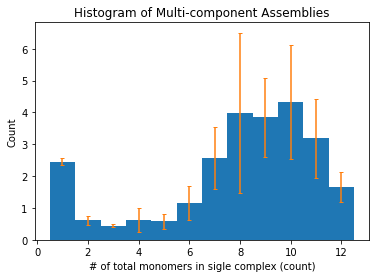

In [33]:
result = io.multi_hist(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, FinalTime = 1, \
                       SpeciesList = ['A','B'], xAxis = 'tot') 

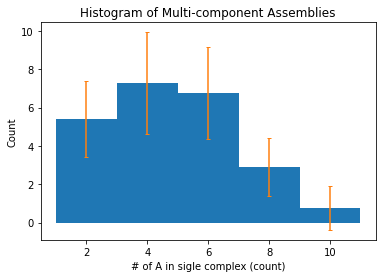

In [34]:
result = io.multi_hist(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, FinalTime = 1, \
                       SpeciesList = ['A','B'], xAxis = 'A', BarSize = 2) 

In [35]:
io.multi_hist(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, FinalTime = 1, \
           SpeciesList = ['A','B'], xAxis = 'C') 

xAxis not in SpeciesList!


0

In [10]:
# !!!ALREADY UPLOADED TO PACKAGE!!!

# def multi_hist_stacked(FileName:str, FileNum:int, InitialTime:float, FinalTime:float, \
#                        SpeciesList:list, xAxis:str, DivideSpecies:str, DivideSize:int, \
#                        BarSize:int = 1, ExcludeSize:int = 0, SaveFig:bool = False):
#     file_name_head = FileName.split('.')[0]
#     file_name_tail = FileName.split('.')[1]
#     above_list = []
#     equal_list = []
#     below_list = []
#     size_list = []
#     for i in range(1, FileNum+1):
#         temp_file_name = file_name_head + '_' + str(i) + '.' + file_name_tail
#         if FileNum == 1:
#             temp_file_name = 'histogram_complexes_time.dat'
#         total_size_list = []
#         total_above_list = []
#         total_equal_list = []
#         total_below_list = []
#         hist_list = read_multi_hist(temp_file_name, SpeciesList)
#         data_count = 0
#         for j in range(len(hist_list)):
#             if hist_list[j] != []:
#                 time = hist_list[j][0]
#                 if InitialTime <= time <= FinalTime:
#                     data_count += 1
#                     for k in range(len(hist_list[j])):
#                         if k != 0:
#                             if xAxis == 'tot' and DivideSpecies in SpeciesList:
#                                 total_size = sum(hist_list[j][k][0:-1])
#                                 divide_index = SpeciesList.index(DivideSpecies)
#                                 divide_spe_size = hist_list[j][k][divide_index]
#                                 if total_size >= ExcludeSize:
#                                     if total_size not in total_size_list:
#                                         total_size_list.append(total_size)
#                                         if divide_spe_size > DivideSize:
#                                             total_above_list.append(hist_list[j][k][-1])
#                                             total_equal_list.append(0.0)
#                                             total_below_list.append(0.0)
#                                         elif divide_spe_size == DivideSize:
#                                             total_equal_list.append(hist_list[j][k][-1])
#                                             total_above_list.append(0.0)
#                                             total_below_list.append(0.0)
#                                         else:
#                                             total_below_list.append(hist_list[j][k][-1])
#                                             total_above_list.append(0.0)
#                                             total_equal_list.append(0.0)
#                                     else:
#                                         if divide_spe_size > DivideSize:
#                                             index = total_size_list.index(total_size)
#                                             total_above_list[index] += hist_list[j][k][-1]
#                                         elif divide_spe_size == DivideSize:
#                                             index = total_size_list.index(total_size)
#                                             total_equal_list[index] += hist_list[j][k][-1]
#                                         else:
#                                             index = total_size_list.index(total_size)
#                                             total_below_list[index] += hist_list[j][k][-1]
#                             elif xAxis in SpeciesList and DivideSpecies in SpeciesList:
#                                 name_index = SpeciesList.index(xAxis)
#                                 total_size = hist_list[j][k][name_index]
#                                 divide_index = SpeciesList.index(DivideSpecies)
#                                 divide_spe_size = hist_list[j][k][divide_index]
#                                 if total_size >= ExcludeSize:
#                                     if total_size not in total_size_list:
#                                         total_size_list.append(total_size)
#                                         if divide_spe_size > DivideSize:
#                                             total_above_list.append(hist_list[j][k][-1])
#                                             total_equal_list.append(0.0)
#                                             total_below_list.append(0.0)
#                                         elif divide_spe_size == DivideSize:
#                                             total_equal_list.append(hist_list[j][k][-1])
#                                             total_above_list.append(0.0)
#                                             total_below_list.append(0.0)
#                                         else:
#                                             total_below_list.append(hist_list[j][k][-1])
#                                             total_above_list.append(0.0)
#                                             total_equal_list.append(0.0)
#                                     else:
#                                         if divide_spe_size > DivideSize:
#                                             index = total_size_list.index(total_size)
#                                             total_above_list[index] += hist_list[j][k][-1]
#                                         elif divide_spe_size == DivideSize:
#                                             index = total_size_list.index(total_size)
#                                             total_equal_list[index] += hist_list[j][k][-1]
#                                         else:
#                                             index = total_size_list.index(total_size)
#                                             total_below_list[index] += hist_list[j][k][-1]
#                             else:
#                                 print('xAxis or DivideSpecies not in SpeciesList!')
#                                 return 0
#         total_above_list = np.array(total_above_list)/data_count
#         total_equal_list = np.array(total_equal_list)/data_count
#         total_below_list = np.array(total_below_list)/data_count
#         if len(total_size_list) != 0:
#             total_size_list_sorted = np.arange(1, max(total_size_list)+1, 1)
#         else:
#             total_size_list_sorted = np.array([])
#         total_above_list_sorted = []
#         for i in total_size_list_sorted:
#             if i in total_size_list:
#                 index = total_size_list.index(i)
#                 total_above_list_sorted.append(total_above_list[index])
#             else:
#                 total_above_list_sorted.append(0.0)   
#         total_equal_list_sorted = []
#         for i in total_size_list_sorted:
#             if i in total_size_list:
#                 index = total_size_list.index(i)
#                 total_equal_list_sorted.append(total_equal_list[index])
#             else:
#                 total_equal_list_sorted.append(0.0)
#         total_below_list_sorted = []
#         for i in total_size_list_sorted:
#             if i in total_size_list:
#                 index = total_size_list.index(i)
#                 total_below_list_sorted.append(total_below_list[index])
#             else:
#                 total_below_list_sorted.append(0.0)
#         size_list.append(total_size_list_sorted)
#         above_list.append(total_above_list_sorted)
#         equal_list.append(total_equal_list_sorted)
#         below_list.append(total_below_list_sorted)   
#     max_size = 0
#     for i in size_list:
#         if max_size < len(i):
#             max_size = len(i)
#             n_list = i
#     above_list_filled = np.zeros([FileNum, max_size])
#     above_list_arr = np.array([])
#     for i in range(len(above_list)):
#         for j in range(len(above_list[i])):
#             above_list_filled[i][j] += above_list[i][j]
#     equal_list_filled = np.zeros([FileNum, max_size])
#     equal_list_arr = np.array([])
#     for i in range(len(equal_list)):
#         for j in range(len(equal_list[i])):
#             equal_list_filled[i][j] += equal_list[i][j]
#     below_list_filled = np.zeros([FileNum, max_size])
#     below_list_arr = np.array([])
#     for i in range(len(below_list)):
#         for j in range(len(below_list[i])):
#             below_list_filled[i][j] += below_list[i][j]
#     above_list_rev = []
#     for i in range(len(above_list_filled[0])):
#         temp = []
#         for j in range(len(above_list_filled)):
#             temp.append(above_list_filled[j][i])
#         above_list_rev.append(temp)
#     equal_list_rev = []
#     for i in range(len(equal_list_filled[0])):
#         temp = []
#         for j in range(len(equal_list_filled)):
#             temp.append(equal_list_filled[j][i])
#         equal_list_rev.append(temp)  
#     below_list_rev = []
#     for i in range(len(below_list_filled[0])):
#         temp = []
#         for j in range(len(below_list_filled)):
#             temp.append(below_list_filled[j][i])
#         below_list_rev.append(temp)
#     mean_above = []
#     std_above = []
#     mean_equal = []
#     std_equal = []
#     mean_below = []
#     std_below = []
#     for i in above_list_rev:
#         mean_above.append(np.nanmean(i))
#         std_above.append(np.nanstd(i))
#     for i in equal_list_rev:
#         mean_equal.append(np.nanmean(i))
#         std_equal.append(np.nanstd(i))
#     for i in below_list_rev:
#         mean_below.append(np.nanmean(i))
#         std_below.append(np.nanstd(i))
    
#     mean_above_ = []
#     mean_equal_ = []
#     mean_below_ = []
#     std_above_ = []
#     std_equal_ = []
#     std_below_ = []
#     n_list_ = []
#     temp_mean_above = 0
#     temp_mean_equal = 0
#     temp_mean_below = 0
#     temp_std_above = 0
#     temp_std_equal = 0
#     temp_std_below = 0
#     bar_size_count = 0
#     for i in range(len(mean_above)):
#         temp_mean_above += mean_above[i]
#         temp_mean_equal += mean_equal[i]
#         temp_mean_below += mean_below[i]
#         temp_std_above += std_above[i]
#         temp_std_equal += std_equal[i]
#         temp_std_below += std_below[i]
#         bar_size_count += 1
#         if i+1 == len(mean_above):
#             mean_above_.append(temp_mean_above)
#             mean_equal_.append(temp_mean_equal)
#             mean_below_.append(temp_mean_below)
#             std_above_.append(temp_std_above)
#             std_equal_.append(temp_std_equal)
#             std_below_.append(temp_std_below)
#             n_list_.append(n_list[i])
#         if bar_size_count >= BarSize:
#             mean_above_.append(temp_mean_above)
#             mean_equal_.append(temp_mean_equal)
#             mean_below_.append(temp_mean_below)
#             std_above_.append(temp_std_above)
#             std_equal_.append(temp_std_equal)
#             std_below_.append(temp_std_below)
#             n_list_.append(n_list[i])
#             temp_mean_above = 0
#             temp_mean_equal = 0
#             temp_mean_below = 0
#             temp_std_above = 0
#             temp_std_equal = 0
#             temp_std_below = 0
#             bar_size_count = 0
#     mean_above_ = np.array(mean_above_)
#     mean_equal_ = np.array(mean_equal_)
#     mean_below_ = np.array(mean_below_)
#     std_above_ = np.array(std_above_)
#     std_equal_ = np.array(std_equal_)
#     std_below_ = np.array(std_below_)
#     n_list_ = np.array(n_list_)
    
#     if DivideSize != 0:
#         below_label = DivideSpecies + '<' + str(DivideSize)
#         equal_label = DivideSpecies + '=' + str(DivideSize)
#         above_label = DivideSpecies + '>' + str(DivideSize)
#     else:
#         above_label = 'With ' + DivideSpecies
#         equal_label = 'Without ' + DivideSpecies
#     if FileNum != 1:
#         if DivideSize != 0:
#             plt.bar(n_list_, mean_below_, width = BarSize, color = 'C0', yerr = std_below_, label = below_label, ecolor = 'C3', capsize = 2)
#         plt.bar(n_list_, mean_equal_, width = BarSize, color = 'C1', yerr = std_equal_, bottom = mean_below_, label = equal_label, ecolor = 'C3', capsize = 2)
#         plt.bar(n_list_, mean_above_, width = BarSize, color = 'C2', yerr = std_above_, bottom = mean_below_+mean_equal_, label = above_label, ecolor = 'C3', capsize = 2)
#     else:
#         if DivideSize != 0:
#             plt.bar(n_list_, mean_below_, width = BarSize, color = 'C0', label = below_label, capsize = 2)
#         plt.bar(n_list_, mean_equal_, width = BarSize, color = 'C1', bottom = mean_below_, label = equal_label, capsize = 2)
#         plt.bar(n_list_, mean_above_, width = BarSize, color = 'C2', bottom = mean_below_+mean_equal_, label = above_label, capsize = 2)
#     if xAxis == 'tot':
#         x_label_name = 'total monomers'
#     else:
#         x_label_name = xAxis
#     plt.xlabel('# of ' + x_label_name + ' in sigle complex')
#     plt.ylabel('Count')
#     plt.legend()
#     plt.title('Histogram of Multi-component Assemblies')
#     fig_name = 'stacked_histogram_of_' + xAxis + '_divided_by_' + DivideSpecies
#     if SaveFig:
#         plt.savefig(fig_name, dpi = 500)
#     plt.show()
#     return 0

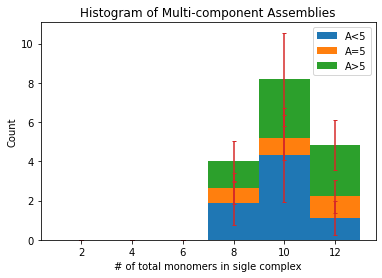

In [36]:
result = io.multi_hist_stacked(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, \
                               FinalTime = 1, SpeciesList = ['A','B'], xAxis = 'tot', \
                               DivideSpecies = 'A', DivideSize = 5, BarSize = 2, ExcludeSize = 8)

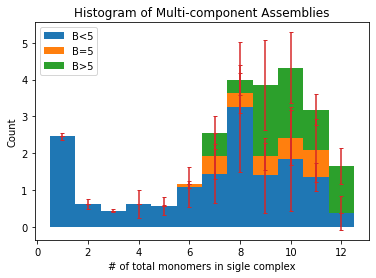

In [37]:
result = io.multi_hist_stacked(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, \
                               FinalTime = 1, SpeciesList = ['A','B'], xAxis = 'tot', \
                               DivideSpecies = 'B', DivideSize = 5)

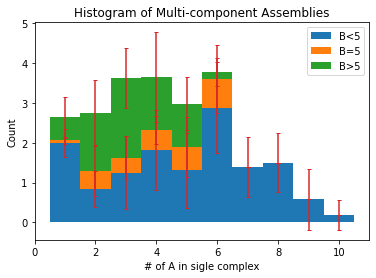

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([1.995005  , 0.82657343, 1.24555445, 1.81838162, 1.3046953 ,
        2.88591409, 1.38781219, 1.4985015 , 0.57402597, 0.19060939]),
 array([0.06813187, 0.47192807, 0.38361638, 0.51108891, 0.58121878,
        0.71908092, 0.        , 0.        , 0.        , 0.        ]),
 array([0.57442557, 1.46153846, 1.997003  , 1.32107892, 1.0985015 ,
        0.17242757, 0.        , 0.        , 0.        , 0.        ]),
 array([0.34143568, 0.45205898, 0.91354551, 0.99764211, 0.94255816,
        1.14722595, 0.76258698, 0.74082616, 0.76453791, 0.38121878]),
 array([0.09025   , 0.62805107, 0.54171726, 0.35421403, 0.75634191,
        0.8556464 , 0.        , 0.        , 0.        , 0.        ]),
 array([0.50670292, 0.80898284, 0.76399819, 1.12750646, 0.67602586,
        0.34485514, 0.        , 0.        , 0.        , 0.        ]))

In [13]:
result = io.multi_hist_stacked(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, \
                               FinalTime = 1, SpeciesList = ['A','B'], xAxis = 'A', \
                               DivideSpecies = 'B', DivideSize = 5)

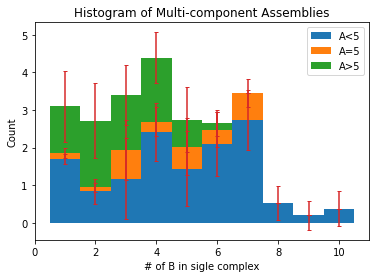

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([1.6997003 , 0.83516484, 1.17662338, 2.42037962, 1.44395604,
        2.09490509, 2.73466533, 0.53586414, 0.2035964 , 0.37922078]),
 array([0.15724276, 0.11048951, 0.75424575, 0.27292707, 0.58121878,
        0.38201798, 0.71648352, 0.        , 0.        , 0.        ]),
 array([1.23796204, 1.77302697, 1.47152847, 1.7000999 , 0.71908092,
        0.17242757, 0.        , 0.        , 0.        , 0.        ]),
 array([0.12694249, 0.34265006, 1.07257083, 0.76625015, 0.99801122,
        0.84314146, 0.79071332, 0.45790204, 0.3899455 , 0.46449168]),
 array([0.14509072, 0.12705722, 0.80269814, 0.38685127, 0.75634191,
        0.46795817, 0.37174566, 0.        , 0.        , 0.        ]),
 array([0.9335604 , 0.99433102, 0.80264219, 0.67332294, 0.8556464 ,
        0.34485514, 0.        , 0.        , 0.        , 0.        ]))

In [14]:
result = io.multi_hist_stacked(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, \
                               FinalTime = 1, SpeciesList = ['A','B'], xAxis = 'B', \
                               DivideSpecies = 'A', DivideSize = 5)

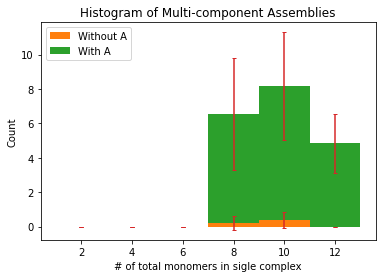

In [38]:
result = io.multi_hist_stacked(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, 
                               FinalTime = 1, SpeciesList = ['A','B'], xAxis = 'tot', \
                               DivideSpecies = 'A', DivideSize = 0, BarSize = 2, ExcludeSize = 7)

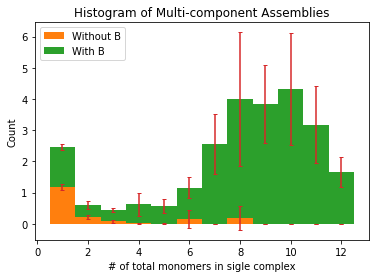

In [39]:
result = io.multi_hist_stacked(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, \
                               FinalTime = 1, SpeciesList = ['A','B'], xAxis = 'tot', \
                               DivideSpecies = 'B', DivideSize = 0)

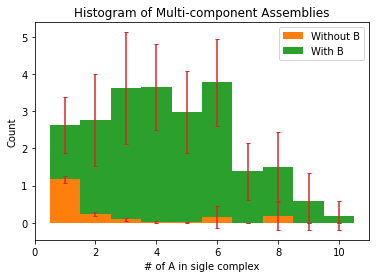

In [40]:
result = io.multi_hist_stacked(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, \
                               FinalTime = 1, SpeciesList = ['A','B'], xAxis = 'A', \
                               DivideSpecies = 'B', DivideSize = 0)

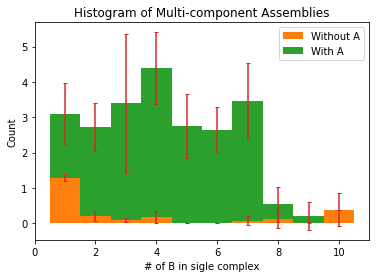

In [42]:
result = io.multi_hist_stacked(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, \
                               FinalTime = 1, SpeciesList = ['A','B'], xAxis = 'B', \
                               DivideSpecies = 'A', DivideSize = 0)

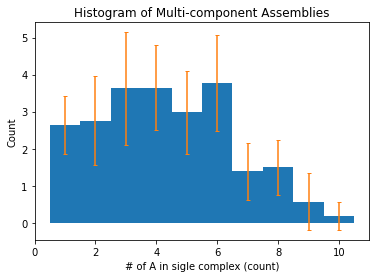

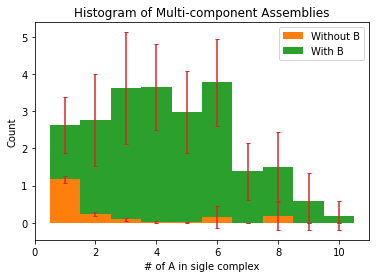

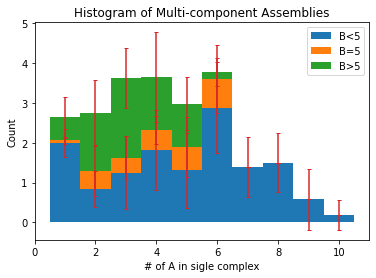

In [41]:
# compare stacked & non-stacked with same input
result = io.multi_hist(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, FinalTime = 1, \
           SpeciesList = ['A','B'], xAxis = 'A') 
result = io.multi_hist_stacked(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, FinalTime = 1, \
                   SpeciesList = ['A','B'], xAxis = 'A', DivideSpecies = 'B', DivideSize = 0)
result = io.multi_hist_stacked(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, FinalTime = 1, \
                   SpeciesList = ['A','B'], xAxis = 'A', DivideSpecies = 'B', DivideSize = 5)

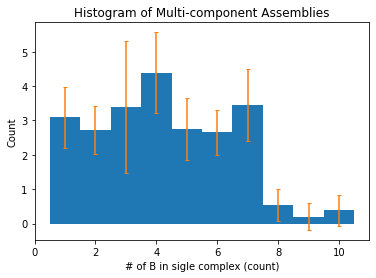

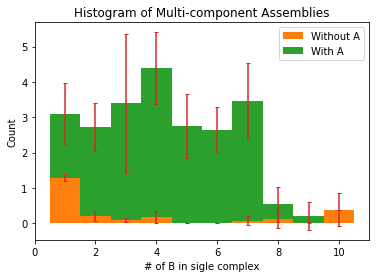

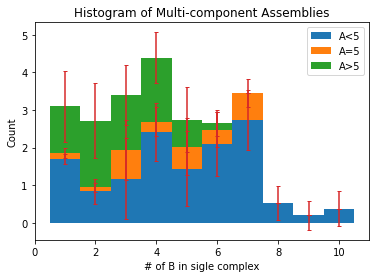

In [43]:
# compare stacked & non-stacked with same input
result = io.multi_hist(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, FinalTime = 1, \
           SpeciesList = ['A','B'], xAxis = 'B') 
result = io.multi_hist_stacked(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, FinalTime = 1, \
                   SpeciesList = ['A','B'], xAxis = 'B', DivideSpecies = 'A', DivideSize = 0)
result = io.multi_hist_stacked(FileName = 'histogram_complexes_time.dat', FileNum = 5, InitialTime = 0, FinalTime = 1, \
                   SpeciesList = ['A','B'], xAxis = 'B', DivideSpecies = 'A', DivideSize = 5)

In [21]:
def multi_heatmap(FileName:str, FileNum:int, InitialTime:float, FinalTime:float, \
                  SpeciesList:list, xAxis:str, yAxis:str, xBarSize:int = 1, yBarSize:int = 1, 
                  ShowMean:bool = False, ShowStd:bool = False, SaveFig:bool = False):
    file_name_head = FileName.split('.')[0]
    file_name_tail = FileName.split('.')[1]
    count_list_sum = []
    for i in range(1, FileNum+1):
        temp_file_name = file_name_head + '_' + str(i) + '.' + file_name_tail
        if FileNum == 1:
            temp_file_name = 'histogram_complexes_time.dat'
        x_size_list = []
        y_size_list = []
        hist_list = read_multi_hist(temp_file_name, SpeciesList = SpeciesList)
        for j in range(len(hist_list)):
            if hist_list[j] != []:
                time = hist_list[j][0]
                if InitialTime <= time <= FinalTime:
                    for k in range(len(hist_list[j])):
                        if k != 0:
                            if xAxis in SpeciesList and yAxis in SpeciesList:
                                x_name_index = SpeciesList.index(xAxis)
                                x_size = hist_list[j][k][x_name_index]
                                x_size = int(x_size / xBarSize)
                                y_name_index = SpeciesList.index(yAxis)
                                y_size = hist_list[j][k][y_name_index]
                                y_size = int(y_size / yBarSize)
                                if x_size not in x_size_list:
                                    if len(x_size_list) == 0:
                                        for m in range(0, x_size+1):
                                            x_size_list.append(m)
                                    else:
                                        if x_size - x_size_list[-1] == 1:
                                            x_size_list.append(x_size)
                                        else:
                                            diff = x_size - x_size_list[-1]
                                            for m in range(x_size_list[-1]+1, x_size+1):
                                                x_size_list.append(m)
                                if y_size not in y_size_list:
                                    if len(y_size_list) == 0:
                                        for m in range(0, y_size+1):
                                            y_size_list.append(m)
                                    else:
                                        if y_size - y_size_list[-1] == 1:
                                            y_size_list.append(y_size)
                                        else:
                                            for m in range(y_size_list[-1]+1, y_size+1):
                                                y_size_list.append(m)
                                
                            else:
                                print('xAxis or yAxos not in SpeciesList!')
                                return 0
                            
        count_list = np.zeros([len(y_size_list), len(x_size_list)])
        data_count = 0
        for j in range(len(hist_list)):
            if hist_list[j] != []:
                time = hist_list[j][0]
                if InitialTime <= time <= FinalTime:
                    data_count += 1
                    for k in range(len(hist_list[j])):
                        if k != 0:
                            count = hist_list[j][k][-1]
                            x_name_index = SpeciesList.index(xAxis)
                            x_size = hist_list[j][k][x_name_index]
                            x_size = int(x_size / xBarSize)
                            y_name_index = SpeciesList.index(yAxis)
                            y_size = hist_list[j][k][y_name_index]
                            y_size = int(y_size / yBarSize)
                            count_list[y_size][x_size] += count
        count_list = count_list/data_count
        count_list_sum.append(count_list)
        
    max_x = 0
    max_y = 0
    for i in count_list_sum:
        if len(i[0]) > max_x:
            max_x = len(i[0])
        if len(i) > max_y:
            max_y = len(i)
    count_list_sum_ = []
    for i in range(len(count_list_sum)):
        temp_matrix = np.zeros([max_y, max_x])
        for j in range(len(count_list_sum[i])):
            for k in range(len(count_list_sum[i][j])):
                temp_matrix[j][k] += count_list_sum[i][j][k]
        count_list_sum_.append(temp_matrix)
    count_list_mean = np.zeros([max_y, max_x])
    count_list_std = np.zeros([max_y, max_x])
    for i in range(len(count_list_sum_[0])):
        for j in range(len(count_list_sum_[0][0])):
            temp_list = []
            for k in range(len(count_list_sum_)):
                temp_list.append(count_list_sum_[k][i][j])
            count_list_mean[i][j] += np.mean(temp_list)
            count_list_std[i][j] += np.std(temp_list)
    x_list = np.arange(0, max_x) * xBarSize
    y_list = np.arange(0, max_y) * yBarSize
    
    fig, ax = plt.subplots()
    im = ax.imshow(count_list_mean)
    ax.set_xticks(np.arange(len(x_list)))
    ax.set_yticks(np.arange(len(y_list)))
    ax.set_xticklabels(x_list)
    ax.set_yticklabels(y_list)
    if ShowMean and ShowStd:
        print('Cannot show both maen and std!')
        return 0
    if ShowMean:
        fig_name = 'Complex_Distribution_of_' + xAxis + '_and_' + yAxis + '_with_mean'
        for i in range(len(y_list)):
            for j in range(len(x_list)):
                text = ax.text(j, i, round(count_list_mean[i, j],1),ha='center', va='center', color='w')
    elif ShowStd and FileNum != 1:
        fig_name = 'Complex_Distribution_of_' + xAxis + '_and_' + yAxis + '_with_std'
        for i in range(len(y_list)):
            for j in range(len(x_list)):
                text = ax.text(j, i, round(count_list_std[i, j],1),ha='center', va='center', color='w')
    else:
        fig_name = 'Complex_Distribution_of_' + xAxis + '_and_' + yAxis
    ax.set_title('Complex Distribution of ' + xAxis + ' and ' + yAxis)
    fig.tight_layout()
    plt.colorbar(im)
    plt.xlabel('Count of ' + xAxis)
    plt.ylabel('Count of ' + yAxis)
    if SaveFig:
        plt.savefig(fig_name, dpi = 500,  bbox_inches='tight')
    plt.show()
    return 0

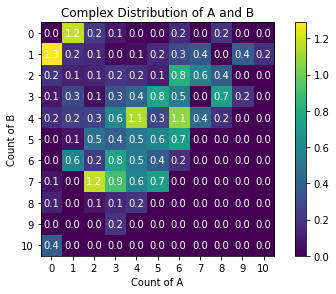

0

In [44]:
multi_heatmap(FileName = 'histogram_complexes_time.dat', FileNum = 5, \
              InitialTime = 0, FinalTime = 1, SpeciesList = ['A','B'], \
              xAxis = 'A', yAxis = 'B', xBarSize = 1, yBarSize = 1, ShowMean = True)

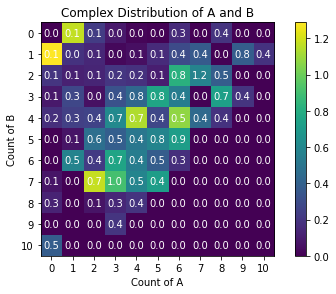

0

In [45]:
multi_heatmap(FileName = 'histogram_complexes_time.dat', FileNum = 5, \
              InitialTime = 0, FinalTime = 1, SpeciesList = ['A','B'], \
              xAxis = 'A', yAxis = 'B', xBarSize = 1, yBarSize = 1, ShowStd = True)

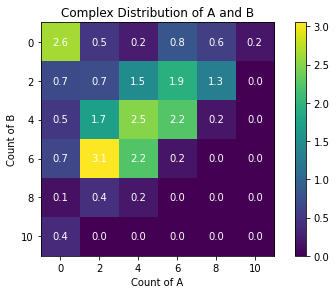

0

In [46]:
multi_heatmap(FileName = 'histogram_complexes_time.dat', FileNum = 5, \
              InitialTime = 0, FinalTime = 1, SpeciesList = ['A','B'], \
              xAxis = 'A', yAxis = 'B', xBarSize = 2, yBarSize = 2, ShowMean = True)

In [25]:
def multi_3D_hist(FileName:str, FileNum:int, InitialTime:float, FinalTime:float, \
                  SpeciesList:list, xAxis:str, yAxis:str, xBarSize:int = 1, yBarSize:int = 1, 
                  SaveFig:bool = False):
    warnings.filterwarnings('ignore')
    file_name_head = FileName.split('.')[0]
    file_name_tail = FileName.split('.')[1]
    count_list_sum = []
    for i in range(1, FileNum+1):
        temp_file_name = file_name_head + '_' + str(i) + '.' + file_name_tail
        if FileNum == 1:
            temp_file_name = 'histogram_complexes_time.dat'
        x_size_list = []
        y_size_list = []
        hist_list = read_multi_hist(temp_file_name, SpeciesList = SpeciesList)
        for j in range(len(hist_list)):
            if hist_list[j] != []:
                time = hist_list[j][0]
                if InitialTime <= time <= FinalTime:
                    for k in range(len(hist_list[j])):
                        if k != 0:
                            if xAxis in SpeciesList and yAxis in SpeciesList:
                                x_name_index = SpeciesList.index(xAxis)
                                true_x_size = hist_list[j][k][x_name_index]
                                x_size = int(true_x_size / xBarSize)
                                y_name_index = SpeciesList.index(yAxis)
                                true_y_size = hist_list[j][k][y_name_index]
                                y_size = int(true_y_size / yBarSize)
                                if x_size not in x_size_list:
                                    if len(x_size_list) == 0:
                                        for m in range(0, x_size+1):
                                            x_size_list.append(m)
                                    else:
                                        if x_size - x_size_list[-1] == 1:
                                            x_size_list.append(x_size)
                                        else:
                                            diff = x_size - x_size_list[-1]
                                            for m in range(x_size_list[-1]+1, x_size+1):
                                                x_size_list.append(m)
                                if y_size not in y_size_list:
                                    if len(y_size_list) == 0:
                                        for m in range(0, y_size+1):
                                            y_size_list.append(m)
                                    else:
                                        if y_size - y_size_list[-1] == 1:
                                            y_size_list.append(y_size)
                                        else:
                                            for m in range(y_size_list[-1]+1, y_size+1):
                                                y_size_list.append(m)
                            else:
                                print('xAxis or yAxos not in SpeciesList!')
                                return 0
        count_list = np.zeros([len(y_size_list), len(x_size_list)])
        data_count = 0
        for j in range(len(hist_list)):
            if hist_list[j] != []:
                time = hist_list[j][0]
                if InitialTime <= time <= FinalTime:
                    data_count += 1
                    for k in range(len(hist_list[j])):
                        if k != 0:
                            count = hist_list[j][k][-1]
                            x_name_index = SpeciesList.index(xAxis)
                            x_size = hist_list[j][k][x_name_index]
                            x_size = int(x_size / xBarSize)
                            y_name_index = SpeciesList.index(yAxis)
                            y_size = hist_list[j][k][y_name_index]
                            y_size = int(y_size / yBarSize)
                            count_list[y_size][x_size] += count
        count_list = count_list/data_count
        count_list_sum.append(count_list)
    
    max_x = 0
    max_y = 0
    for i in count_list_sum:
        if len(i[0]) > max_x:
            max_x = len(i[0])
        if len(i) > max_y:
            max_y = len(i)
    count_list_sum_ = []
    for i in range(len(count_list_sum)):
        temp_matrix = np.zeros([max_y, max_x])
        for j in range(len(count_list_sum[i])):
            for k in range(len(count_list_sum[i][j])):
                temp_matrix[j][k] += count_list_sum[i][j][k]
        count_list_sum_.append(temp_matrix)
    count_list_mean = np.zeros([max_y, max_x])
    count_list_std = np.zeros([max_y, max_x])
    for i in range(len(count_list_sum_[0])):
        for j in range(len(count_list_sum_[0][0])):
            temp_list = []
            for k in range(len(count_list_sum_)):
                temp_list.append(count_list_sum_[k][i][j])
            count_list_mean[i][j] += np.mean(temp_list)
            count_list_std[i][j] += np.std(temp_list)
    
    x_list = np.arange(0, max_x) * xBarSize
    y_list = np.arange(0, max_y) * yBarSize
    xx, yy = np.meshgrid(x_list, y_list)
    X, Y = xx.ravel(), yy.ravel()
    Z = count_list_mean.ravel()
    width = xBarSize
    depth = yBarSize
    bottom = np.zeros_like(Z)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.bar3d(X, Y, bottom, width, depth, Z, shade=True)
    ax.set_xlabel('# of ' + xAxis + ' in sigle complex')
    ax.set_ylabel('# of ' + yAxis + ' in sigle complex')
    ax.set_zlabel('Relative Occurrence Probability')
    ax.set_title('Complex Distribution of ' + xAxis + ' and ' + yAxis)
    fig.tight_layout()
    plt.xlabel('Count of ' + xAxis)
    plt.ylabel('Count of ' + yAxis)
    if SaveFig:
        plt.savefig('3D_hisogram_of_' + xAxis + '_and_' + yAxis, dpi = 500,  bbox_inches='tight')
    plt.show()
    return 0

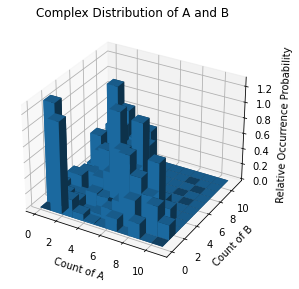

0

In [47]:
multi_3D_hist(FileName = 'histogram_complexes_time.dat', FileNum = 5, \
              InitialTime = 0, FinalTime = 1, SpeciesList = ['A','B'], \
              xAxis = 'A', yAxis = 'B', xBarSize = 1, yBarSize = 1, SaveFig = True)

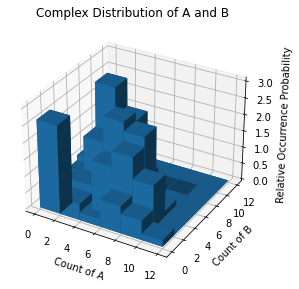

0

In [48]:
multi_3D_hist(FileName = 'histogram_complexes_time.dat', FileNum = 5, \
              InitialTime = 0, FinalTime = 1, SpeciesList = ['A','B'], \
              xAxis = 'A', yAxis = 'B', xBarSize = 2, yBarSize = 2, SaveFig = True)

In [28]:
read_multi_hist('histogram_complexes_time_1.dat', ['A', 'B'])

[[0.0, array([  1.,   0., 100.]), array([  0.,   1., 100.])],
 [0.001,
  array([ 1.,  0., 91.]),
  array([1., 1., 2.]),
  array([3., 0., 1.]),
  array([2., 0., 1.]),
  array([ 0.,  1., 94.]),
  array([2., 1., 1.]),
  array([0., 3., 1.])],
 [0.002,
  array([ 1.,  0., 82.]),
  array([1., 1., 4.]),
  array([2., 1., 3.]),
  array([3., 0., 1.]),
  array([ 0.,  1., 81.]),
  array([2., 0., 2.]),
  array([1., 3., 1.]),
  array([0., 3., 1.]),
  array([0., 2., 3.])],
 [0.003,
  array([ 1.,  0., 71.]),
  array([1., 1., 9.]),
  array([2., 1., 3.]),
  array([3., 1., 1.]),
  array([2., 0., 4.]),
  array([ 0.,  1., 73.]),
  array([2., 3., 1.]),
  array([1., 3., 1.]),
  array([0., 2., 4.])],
 [0.004,
  array([ 1.,  0., 62.]),
  array([ 1.,  1., 10.]),
  array([2., 1., 3.]),
  array([3., 1., 1.]),
  array([2., 0., 6.]),
  array([ 0.,  1., 66.]),
  array([2., 3., 1.]),
  array([1., 2., 1.]),
  array([1., 3., 1.]),
  array([3., 0., 1.]),
  array([0., 2., 6.])],
 [0.005,
  array([ 1.,  0., 59.]),
  array(

In [57]:
def multi_max_complex(FileName:str, FileNum:int, InitialTime:float, FinalTime:float, \
                     SpeciesList:list, SpeciesName:str, SaveFig:bool = False):
    
    file_name_head = FileName.split('.')[0]
    file_name_tail = FileName.split('.')[1]
    time_list = []
    size_list = []
    for i in range(1, FileNum+1):
        temp_file_name = file_name_head + '_' + str(i) + '.' + file_name_tail
        if FileNum == 1:
            temp_file_name = 'histogram_complexes_time.dat'
        total_size_list = []
        total_time_list = []
        hist_list = read_multi_hist(temp_file_name, SpeciesList = SpeciesList)
        data_count = 0
        for j in range(len(hist_list)):
            if hist_list[j] != []:
                time = hist_list[j][0]
                if InitialTime <= time <= FinalTime:
                    total_time_list.append(time)
                    temp_size_list = []
                    for k in range(len(hist_list[j])):
                        if k != 0:
                            if SpeciesName == 'tot':
                                total_size = sum(hist_list[j][k][0:-1])
                            elif SpeciesName in SpeciesList:
                                name_index = SpeciesList.index(SpeciesName)
                                total_size = hist_list[j][k][name_index]
                            else:
                                print('SpeciesName not in SpeciesList!')
                                return 0
                            temp_size_list.append(total_size)
                    total_size_list.append(max(temp_size_list))
        size_list.append(total_size_list)
        time_list.append(total_time_list)
    size_list_rev = []
    for i in range(len(size_list[0])):
        temp = []
        for j in range(len(size_list)):
            temp.append(size_list[j][i])
        size_list_rev.append(temp)
    mean = []
    std = []
    for i in size_list_rev:
        mean.append(np.nanmean(i))
        std.append(np.nanstd(i))
    mean = np.array(mean)
    std = np.array(std)
    
    errorbar_color = '#c9e3f6'
    plt.plot(time_list[0], mean, color='C0')
    if FileNum > 1:
        plt.errorbar(time_list[0], mean, color='C0', yerr=std, ecolor=errorbar_color)
    if SpeciesName == 'tot':
        title_spec = 'Total Species'
    else:
        title_spec = SpeciesName
    plt.title('Maximum Number of ' + str(title_spec) + ' in Single Complex')
    plt.xlabel('Time')
    plt.ylabel('Maximum Number of ' + str(title_spec))
    if SaveFig:
        plt.savefig('multi_max_complex.png', dpi=500)
    plt.show()
    return time_list[0], mean, std

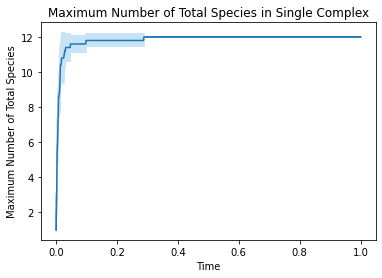

In [58]:
result = multi_max_complex(FileName = 'histogram_complexes_time.dat', FileNum = 5, \
                  InitialTime = 0, FinalTime = 1, 
                  SpeciesList = ['A', 'B'], SpeciesName = 'tot', SaveFig = False)

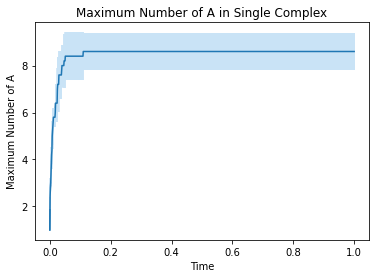

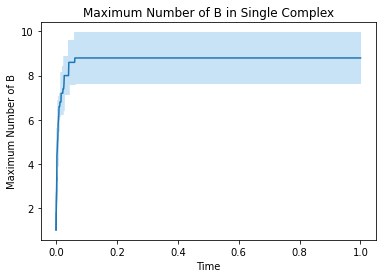

In [59]:
result = multi_max_complex(FileName = 'histogram_complexes_time.dat', FileNum = 5, \
                  InitialTime = 0, FinalTime = 1, 
                  SpeciesList = ['A', 'B'], SpeciesName = 'A', SaveFig = False)
result = multi_max_complex(FileName = 'histogram_complexes_time.dat', FileNum = 5, \
                  InitialTime = 0, FinalTime = 1, 
                  SpeciesList = ['A', 'B'], SpeciesName = 'B', SaveFig = False)

In [21]:
def multi_mean_complex(FileName:str, FileNum:int, InitialTime:float, FinalTime:float, \
                     SpeciesList:list, SpeciesName:str, ExcludeSize:int = 0, SaveFig:bool = False):
    
    file_name_head = FileName.split('.')[0]
    file_name_tail = FileName.split('.')[1]
    time_list = []
    size_list = []
    for i in range(1, FileNum+1):
        temp_file_name = file_name_head + '_' + str(i) + '.' + file_name_tail
        if FileNum == 1:
            temp_file_name = 'histogram_complexes_time.dat'
        total_size_list = []
        total_time_list = []
        hist_list = read_multi_hist(temp_file_name, SpeciesList = SpeciesList)
        data_count = 0
        for j in range(len(hist_list)):
            if hist_list[j] != []:
                time = hist_list[j][0]
                if InitialTime <= time <= FinalTime:
                    total_time_list.append(time)
                    temp_sum = 0
                    count = 0
                    for k in range(len(hist_list[j])):
                        if k != 0:
                            if SpeciesName == 'tot':
                                total_size = sum(hist_list[j][k][0:-1])
                            elif SpeciesName in SpeciesList:
                                name_index = SpeciesList.index(SpeciesName)
                                total_size = hist_list[j][k][name_index]
                            else:
                                print('SpeciesName not in SpeciesList!')
                                return 0
                            
                            if total_size >= ExcludeSize:
                                count += hist_list[j][k][-1]
                                temp_sum += total_size * hist_list[j][k][-1]
                    if count != 0:
                        total_size_list.append(temp_sum/count)
                    else:
                        total_size_list.append(0.0)          
        size_list.append(total_size_list)
        time_list.append(total_time_list)
    size_list_rev = []
    for i in range(len(size_list[0])):
        temp = []
        for j in range(len(size_list)):
            temp.append(size_list[j][i])
        size_list_rev.append(temp)
    mean = []
    std = []
    for i in size_list_rev:
        mean.append(np.nanmean(i))
        std.append(np.nanstd(i))
    mean = np.array(mean)
    std = np.array(std)
    
    errorbar_color = '#c9e3f6'
    plt.plot(time_list[0], mean, color='C0')
    if FileNum > 1:
        plt.errorbar(time_list[0], mean, color='C0', yerr=std, ecolor=errorbar_color)
    if SpeciesName == 'tot':
        title_spec = 'Total Species'
    else:
        title_spec = SpeciesName
    plt.title('Maximum Number of ' + str(title_spec) + ' in Single Complex')
    plt.xlabel('Time')
    plt.ylabel('Maximum Number of ' + str(title_spec))
    if SaveFig:
        plt.savefig('multi_max_complex.png', dpi=500)
    plt.show()
    return time_list[0], mean, std

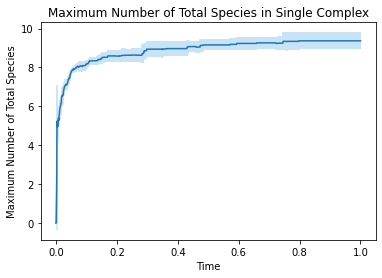

In [25]:
result = multi_mean_complex(FileName = 'histogram_complexes_time.dat', FileNum = 5, \
                  InitialTime = 0, FinalTime = 1, 
                  SpeciesList = ['A', 'B'], SpeciesName = 'tot', ExcludeSize = 0, SaveFig = False)

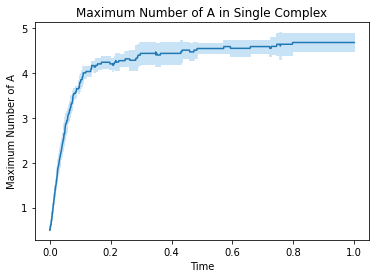

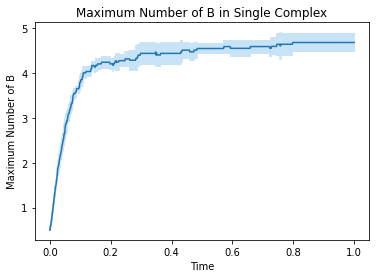

In [27]:
result = multi_mean_complex(FileName = 'histogram_complexes_time.dat', FileNum = 5, \
                  InitialTime = 0, FinalTime = 1, 
                  SpeciesList = ['A', 'B'], SpeciesName = 'A', ExcludeSize = 0, SaveFig = False)
result = multi_mean_complex(FileName = 'histogram_complexes_time.dat', FileNum = 5, \
                  InitialTime = 0, FinalTime = 1, 
                  SpeciesList = ['A', 'B'], SpeciesName = 'B', ExcludeSize = 0, SaveFig = False)